# Logistic Regression model

## 1. Importing modules

In [ ]:
import pandas as pd

import sys
sys.path.insert(0, "/work/emotions-nlp")

from src.utils.functions import *

## 2. Loading the clean dataset

In [ ]:
df = load_dataset('/work/emotions-nlp/Data/intermediate_data/clean_data.csv')

In [ ]:
df.head()

,Unnamed: 0,Text,Emotion,clean_text,tokenized,stopwords_removed,porter_stemmer,binary_emotion
0,0,i didnt feel humiliated,sadness,i did not feel humiliated,"['i', 'did', 'not', 'feel', 'humiliated']","['not', 'feel', 'humiliated']","['not', 'feel', 'humili']",0
1,1,i can go from feeling so hopeless to so damned...,sadness,i can go from feeling so hopeless to so damned...,"['i', 'can', 'go', 'from', 'feeling', 'so', 'h...","['go', 'feeling', 'hopeless', 'damned', 'hopef...","['go', 'feel', 'hopeless', 'damn', 'hope', 'ar...",0
2,2,im grabbing a minute to post i feel greedy wrong,anger,i am grabbing a minute to post i feel greedy w...,"['i', 'am', 'grabbing', 'a', 'minute', 'to', '...","['grabbing', 'minute', 'post', 'feel', 'greedy...","['grab', 'minut', 'post', 'feel', 'greedi', 'w...",0
3,3,i am ever feeling nostalgic about the fireplac...,love,i am ever feeling nostalgic about the fireplac...,"['i', 'am', 'ever', 'feeling', 'nostalgic', 'a...","['ever', 'feeling', 'nostalgic', 'fireplace', ...","['ever', 'feel', 'nostalg', 'fireplac', 'know'...",1
4,4,i am feeling grouchy,anger,i am feeling grouchy,"['i', 'am', 'feeling', 'grouchy']","['feeling', 'grouchy']","['feel', 'grouchi']",0


In [ ]:
# Explicative variables
X = df['porter_stemmer']
# Target variable
y = df['binary_emotion']

## 3. Transforming tokens to vectors

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

X, countvectorizer = cv(X)

count vectorize with 1000 features


In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(21456, 1000)

## 4. Division du jeu de données en training/validation/testing sets

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(multi_class='multinomial',penalty='l2')
clf.fit(xtrain, ytrain)

score = clf.score(xtest, ytest)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
ypred = clf.predict(xtest)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2547
           1       0.92      0.90      0.91      1745

    accuracy                           0.93      4292
   macro avg       0.93      0.93      0.93      4292
weighted avg       0.93      0.93      0.93      4292



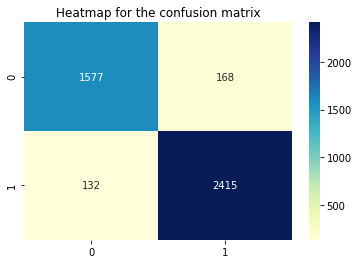

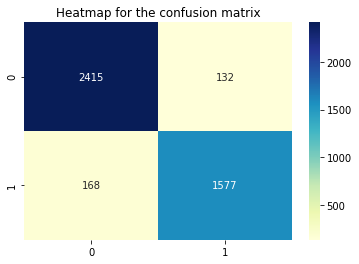

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
show_matrix_heatmap(multilabel_confusion_matrix(ytest, ypred))

In [ ]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.13      0.13      0.13       566
           1       0.11      0.11      0.11       542
           2       0.34      0.36      0.35      1436
           3       0.07      0.06      0.07       316
           4       0.28      0.30      0.29      1234
           5       0.07      0.05      0.06       198

    accuracy                           0.24      4292
   macro avg       0.17      0.17      0.17      4292
weighted avg       0.24      0.24      0.24      4292



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=63592523-ebbf-40aa-802d-b9939a22188a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>